In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas

sns.set_style("whitegrid", {"font.family": "DejaVu Sans"})
sns.set(palette="pastel", color_codes=True)
sns.set_context("poster")

%matplotlib inline

from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)

In [147]:
path = 'data/'
filename_DB = 'DeBruijn_alpha.json'
filename_pUC19 = 'pUC19_alpha.json'
filename_M13 = 'M13_square.json'
filename_DB7k = 'DB_7k_square.json'

#filename_DB_small = 'DB_small.csv'
#filename_pUC19 =
#filename_M13 =
#filename_lambda =

DB_small = pandas.read_csv(path + 'DB_small.csv')
DB_medium = pandas.read_csv(path + 'DB_medium.csv')
DB_large = pandas.read_csv(path + 'DB_large.csv')
pUC19_small = pandas.read_csv(path + 'pUC19_small.csv')
M13_medium = pandas.read_csv(path + 'M13_medium.csv')
lambda_large = pandas.read_csv(path + 'lambda_large.csv')

DB_small['size'] = 'small'
DB_medium['size'] = 'medium'
DB_large['size'] = 'large'
pUC19_small['size'] = 'small'
M13_medium['size'] = 'medium'
lambda_large['size'] = 'large'

DB_small['origin']= 'DBS'
DB_medium['origin']= 'DBS'
DB_large['origin']= 'DBS'
pUC19_small['origin']= 'viral'
M13_medium['origin']= 'viral'
lambda_large['origin']= 'viral'

data = pandas.concat([DB_small, DB_medium, DB_large, pUC19_small, M13_medium, lambda_large])

#filtering sequences
#data = data[data.sequence == 8]
data = data[data['sequence'].map(len) == 8]

print data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6730 entries, 5 to 4443
Data columns (total 5 columns):
id             6730  non-null values
sequence       6730  non-null values
probability    6730  non-null values
size           6730  non-null values
origin         6730  non-null values
dtypes: float64(1), object(4)


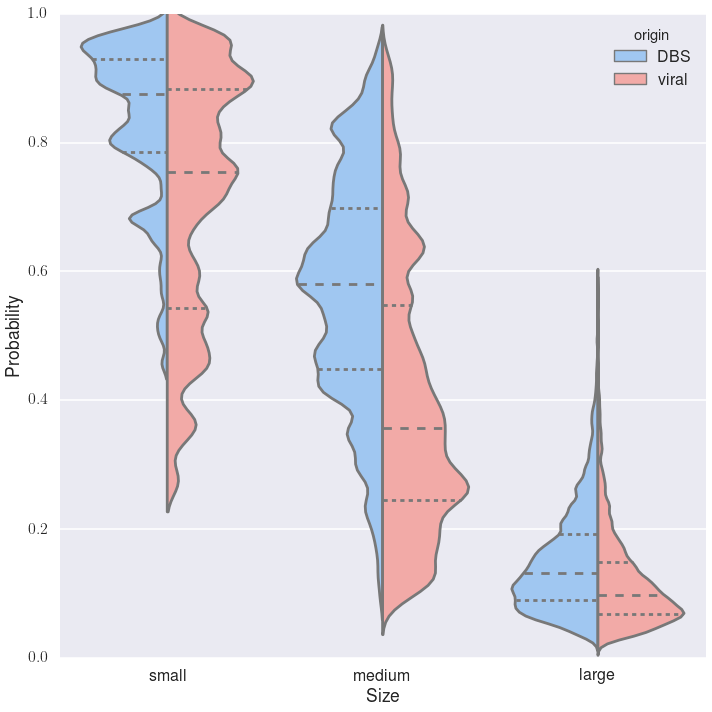

In [154]:
fig = plt.figure(figsize=(10, 10))

sns.violinplot(x="size", y="probability", hue="origin", data=data, split=True,
                palette={"DBS": "b", "viral": "r"}, scale="width", inner="quartiles", bw=.1)

sns.despine(left=True)
plt.tight_layout()
plt.ylim(0,1)
#plt.xlim(0,1)
plt.ylabel('Probability')
plt.xlabel('Size')
plt.show()

In [102]:
path = 'data/'
filename_DB = 'DeBruijn_alpha.json'
filename_pUC19 = 'pUC19_alpha.json'
filename_M13 = 'M13_square.json'
filename_DB7k = 'DB_7k_square.json'

DB_small = seaborn.ree

#ids, sequences, energies
#_, _, energies_DB = read_data(path + filename_DB)
#_, _, energies_pUC19 = read_data(path + filename_pUC19)
#_, _, energies_M13 = read_data(path + filename_M13)

_, _, energies_DB_short = read_data(path + filename_DB, short=True)
_, _, energies_pUC19_short = read_data(path + filename_pUC19, short=True)
_, _, energies_M13_short = read_data(path + filename_M13, short=True)
_, _, energies_DB7k_short = read_data(path + filename_DB7k, short=True)

#DB_dist_2 = get_boltzmann_distribution(d[:2] for d in energies_DB_short)
#pUC19_dist_2 = get_boltzmann_distribution(d[:2] for d in energies_pUC19_short)
#M13_dist_2 = get_boltzmann_distribution(d[:2] for d in energies_M13_short)

#DB_dist_10 = get_boltzmann_distribution(d[:10] for d in energies_DB_short)
#pUC19_dist_10 = get_boltzmann_distribution(d[:10] for d in energies_pUC19_short)
#M13_dist_10 = get_boltzmann_distribution(d[:10] for d in energies_M13_short)

#DB_dist_100 = get_boltzmann_distribution(d[:100] for d in energies_DB_short)
#pUC19_dist_100 = get_boltzmann_distribution(d[:100] for d in energies_pUC19_short)
#M13_dist_100 = get_boltzmann_distribution(d[:100] for d in energies_M13_short)

DB_dist_all = get_boltzmann_distribution(d for d in energies_DB_short)
pUC19_dist_all = get_boltzmann_distribution(d for d in energies_pUC19_short)
M13_dist_all = get_boltzmann_distribution(d for d in energies_M13_short)
DB7k_dist_all = get_boltzmann_distribution(d for d in energies_DB7k_short)

#DB_dist = get_boltzmann_distribution(d[:100] for d in energies_DB_short)
#pUC19_dist = get_boltzmann_distribution(d[:100] for d in energies_pUC19_short)
#M13_dist = get_boltzmann_distribution(d[:100] for d in energies_M13_short)

#DB_dist = get_boltzmann_distribution(energies_DB_short)
#pUC19_dist = get_boltzmann_distribution(energies_pUC19_short)

#dist = [d[0] for d in DB_dist]

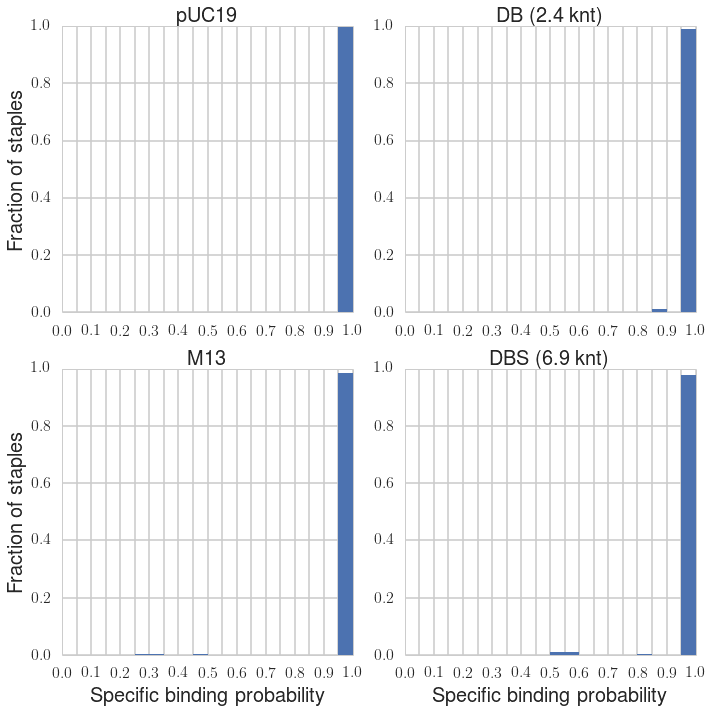

In [106]:
plt.close('all')

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)

data_set = OrderedDict()
data_set['pUC19 (all)'] = pUC19_dist_all
data_set['DB (all)'] = DB_dist_all
data_set['M13 (all)'] = M13_dist_all
data_set['DB7k (all)'] = DB7k_dist_all

xlabel = r'Specific binding probability'
ylabel = r'Fraction of staples'

distribution_plot(ax1, r'pUC19', pUC19_dist_all, '', ylabel)
distribution_plot(ax2, r'DB (2.4 knt)', DB_dist_all, '', '')
distribution_plot(ax3, r'M13', M13_dist_all, xlabel, ylabel)
distribution_plot(ax4, r'DBS (6.9 knt)', DB7k_dist_all, xlabel, '')

#%matplotlib inline

fig.set_size_inches(10, 10)

plt.tight_layout()
plt.savefig("/home/j3ny/repos/analysis/Analysis/thermodynamic_addressability/output/addressability_comparison.pdf",format='pdf',dpi=600)
#plt.savefig("/home/j3ny/repos/analysis/Analysis/thermodynamic_addressability/output/addressability_comparison_long.pdf",format='pdf',dpi=600)


### Code to convert the data from energies to probabilities

In [20]:
## CONVERT DATA

path = 'data/'
filename_DB = 'DeBruijn_alpha.json'
filename_pUC19 = 'pUC19_alpha.json'
filename_M13 = 'M13_square.json'
filename_DB7k = 'DB_7k_square.json'

ids, sequences, energies = read_data(path + filename_DB7k, short=True)
dist_all = get_boltzmann_distribution(d for d in energies)

with open('data/DB_medium.csv', 'w') as out:
    for i in range(len(ids)):
        out.write(ids[i] + ',' + sequences[i] + ',')
        out.write('%.3f' % dist_all[i][0])
        out.write('\n')
    #print idsi], sequences[i], energies_DB_short[i], DB_dist_all[i]

## --------------------------------------
## OBSOLETE CODE BELOW
## --------------------------------------

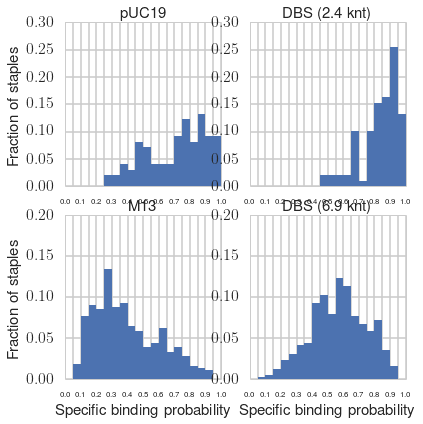

In [43]:
fig, axes = plt.subplots(nrows=2, ncols=2)

bar_width = 1.0

data_set = OrderedDict()
data_set['pUC19'] = pUC19_dist_all
data_set['DBS (2.4 knt)'] = DB_dist_all
data_set['M13'] = M13_dist_all
data_set['DBS (6.9 knt)'] = DB7k_dist_all

plt.close('all')
fig = plt.figure()

from mpl_toolkits.axes_grid1 import Grid
grid = Grid(fig, rect=111, nrows_ncols=(2,2),
            axes_pad=0.4, label_mode='O',
            add_all = True,
            )

for ax, (data_label, data) in zip(grid, data_set.items()):
    xlabel = 'Specific binding probability' if ('6.9' in data_label or 'M13' in data_label) else ''
    ylabel = 'Fraction of staples'if ('pUC' in data_label or 'M13' in data_label) else ''
    distribution_plot(ax, data_label, data, xlabel, ylabel)

#axes[0,0].set_title('pUC19')
    
#grid[0].set_title('pUC19')
#grid[0].set_ylabel('Fraction of staples', fontsize=15)
#grid[1].set_title('DBS (2.4 knt)')

#grid[2].set_title('M13')
#grid[2].set_xlabel('Specific binding probability', fontsize=15)
#grid[2].set_ylabel('Fraction of staples', fontsize=15)

#grid[3].set_title('DBS (6.9 knt)')

#axes[1].set_title('M13')
#axes[2].set_title(r'$\lambda$-phage')

#fig.text(0.16, 0.92, 'pUC19', fontsize=15)
#fig.text(0.6, 0.92, 'DBS (2.4 knt)', fontsize=15)

#fig.text(0.16, 0.46, 'M13mp18', fontsize=15)
#fig.text(0.6, 0.46, 'DBS (6.9 knt)', fontsize=15)

fig.set_size_inches(6, 6)

plt.tight_layout()
plt.savefig("/home/j3ny/repos/analysis/Analysis/thermodynamic_addressability/output/addressability_comparison.pdf",format='pdf',dpi=600)

TypeError: distribution_plot() takes at least 5 arguments (1 given)

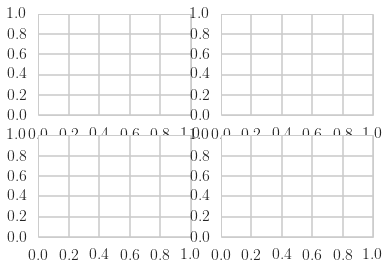

In [44]:
#%matplotlib inline

fig, axes = plt.subplots(nrows=2, ncols=2)

bar_width = 1.0

data_set = OrderedDict()
data_set['pUC19 (all)'] = pUC19_dist_all
data_set['DB (all)'] = DB_dist_all
data_set['M13 (all)'] = M13_dist_all
data_set['DB7k (all)'] = DB7k_dist_all

for ax0, (data_label, data) in zip(axes.flat, data_set.items()):
    distribution_plot(ax0)

#fig.text(0.19, 0.96, 'De Bruijn', ha='center')
fig.text(0.3, 1, 'pUC19 (2.6 knt)', ha='center')
fig.text(0.7, 1, 'DBS (2.4 knt)', ha='center')

fig.text(0.5, 0.008, 'Specific binding probability', ha='center')
fig.text(0.001, 0.5, 'Fraction of staples', va='center', rotation='vertical')

fig.set_size_inches(7, 7)

plt.tight_layout()
plt.savefig("/home/j3ny/repos/analysis/Analysis/thermodynamic_addressability/output/addressability_comparison.pdf",format='pdf',dpi=600)